In [2]:
# Importing all required library
import re
import nltk
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd 

In [23]:
df=pd.read_csv('Elon_musk.csv',encoding='cp1252')
df

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me… https://t.co/WJRzIbKh1H"
1995,1996,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


In [24]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!


In [25]:
df.shape

(1999, 2)

In [26]:
# let's have a look at some tweets
pd.set_option("display.max_colwidth", -1) # allows us to see the full text
df.sample(10)

<ipython-input-26-1565ba7f548d>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1) # allows us to see the full text


,Unnamed: 0,Text
626,627,"@justpaulinelol @teslaownerssv Unfortunately, there are too many rules around liquor distribution, even in the US.… https://t.co/kvHlbueE1u"
1161,1162,@CathieDWood We aren’t cutting the price of Model 3 to $25k. I was referring to a future car that will be smaller than Model 3.
1333,1334,RT @Teslarati: Tesla Energy ramps hiring at Giga New York for accelerated solar production\nhttps://t.co/Iha2DREwu0
1627,1628,"@BernieSanders And why aim your attacks at Tesla, when we’re doing more than any other company on Earth to advance… https://t.co/Vc6iSFxioZ"
254,255,https://t.co/ho7yGXAS3a
529,530,"@RDAnglePhoto @SpaceX @Teslarati Yes, it does."
1882,1883,@nishy03 @hiromichimizuno Congratulations MHI &amp; UAE!
457,458,"@teslaownerssv @astonmartin @Tesla He was indeed quite grumpy, but we did not actually know what we were doing, so he had a point"
56,57,Time to tell the story of Tesla &amp; SpaceX
1485,1486,Bureaucracy is inherently kafkaesque


In [28]:
# we need to remove a lot of junk(urls, tags, RT, Hashtags) from the tweets
# so we will use regular exlpression for that
def clean_tweets(tweets):
  tweets = re.sub('@[A-Za-z0–9]+', '', tweets) #Removing tag(@)
  tweets = re.sub('#', '', tweets) # Removing hashtag(#)
  tweets = re.sub('RT[\s]+', '', tweets) # Removing RT
  tweets = re.sub('https?:\/\/\S+', '', tweets) # Removing links
  return tweets
 
df.Tweets = df.Text.apply(clean_tweets)
# let's see if it cleaned everything or not
pd.set_option("display.max_colwidth", -1) # allows us to see the full text
df.sample(10)


<ipython-input-28-60ef8f135d3b>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Tweets = df.Text.apply(clean_tweets)
<ipython-input-28-60ef8f135d3b>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1) # allows us to see the full text


,Unnamed: 0,Text
61,62,YOLT\n\nhttps://t.co/cnOf9yjpF1
1662,1663,"@engineers_feed Tbh, I must confess to occasionally pontificating about high-concept things"
168,169,It can play Cyberpunk
204,205,"@NASASpaceflight Hopefully, early next week"
835,836,"@jason_rassett Lower latitude states need more satellites in position, so probably January"
1043,1044,@franktinsley @ankitXupta @TashaARK Exactly. We barked up that tree for way too long (sigh). Gives a false sense of… https://t.co/aIGaEnC8f0
1276,1277,@tesladri @ID_AA_Carmack @lexfridman Should be happening soon
1686,1687,RT @SpaceX: Separation confirmed. Dragon performing 4 departure burns to move away from the @Space_Station https://t.co/ea14fozdO8
1046,1047,"@PPathole @TashaARK Yeah, provided we do our metal gear snake autocoupler"
1139,1140,@ErcXspace @SpaceX @FelixSchlang @MarcusHouseGame @Erdayastronaut @NASASpaceflight Great render! The circumferentia… https://t.co/6oTTSIX8aF


In [29]:

# let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# function for Polarity
def calc_pola(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df['Subjectivity'] = df.Tweets.apply(calc_subj)
df['Polarity'] = df.Tweets.apply(calc_pola)
1
2
# let's have quick look to our dataset
df.head(10)


,Unnamed: 0,Text,Subjectivity,Polarity
0,1,@kunalb11 I’m an alien,0.750000,-0.250000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,0.000000,0.000000
2,3,@joerogan @Spotify Great interview!,0.750000,1.000000
3,4,@gtera27 Doge is underestimated,0.000000,0.000000
4,5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,0.366667,0.345313
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0.727273,0.485227
6,7,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM",0.400000,0.000000
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0.500000,0.300000
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,0.500000,0.000000
9,10,The most entertaining outcome is the most likely,0.675000,0.375000


In [30]:
# now let's classify these tweets based on their sentiment(polarity)
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
df['Sentiment'] = df.Polarity.apply(sentiment)
df.head()

,Unnamed: 0,Text,Subjectivity,Polarity,Sentiment
0,1,@kunalb11 I’m an alien,0.750000,-0.250000,Negative
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,0.000000,0.000000,Netural
2,3,@joerogan @Spotify Great interview!,0.750000,1.000000,Positive
3,4,@gtera27 Doge is underestimated,0.000000,0.000000,Netural
4,5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,0.366667,0.345313,Positive


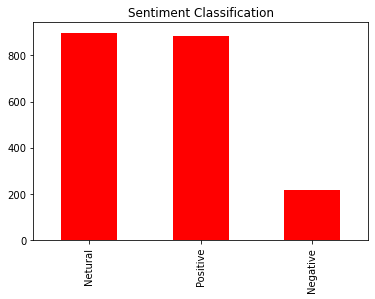

In [31]:

# let's see how many ratio of sentiment
df.Sentiment.value_counts().plot(kind='bar', color='red')
plt.title('Sentiment Classification')
plt.show()

Text(0, 0.5, 'Subjectivity')

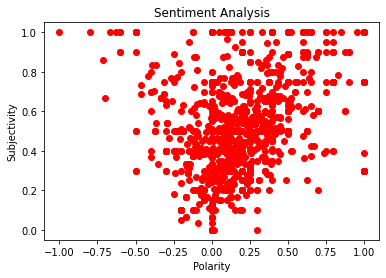

In [32]:
plt.scatter(df.Polarity, df.Subjectivity, color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [33]:
# let's see the percentage of different sentiment's class
 
# Creat
Df_sentiment = pd.DataFrame(df.Sentiment.value_counts(normalize=True)*100)
 
# calculating percentage
Df_sentiment['Total'] = df.Sentiment.value_counts()

Df_sentiment

,Sentiment,Total
Netural,44.922461,898
Positive,44.272136,885
Negative,10.805403,216


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


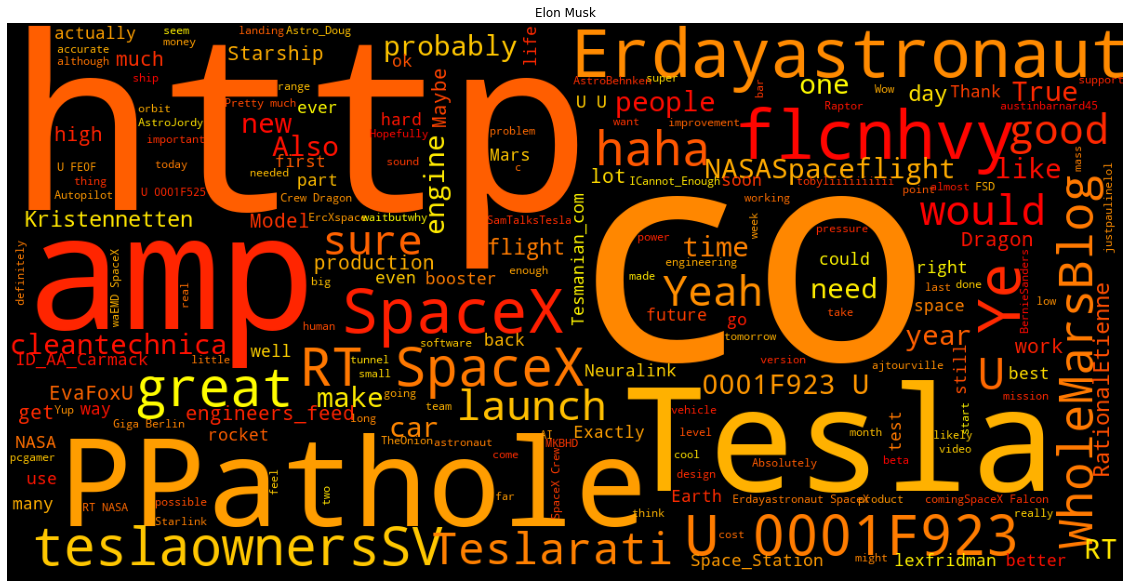

In [35]:
# Alright, let's see which word is used most by Elon
 
# setting up stop words 
nltk.download('stopwords')  # run this if you get any error
stpwrd = set(nltk.corpus.stopwords.words('english'))
 
# Combining all tweets text
allWords = ' '.join([twts for twts in df['Text']])
 
# Image we will use for Word's cloud mask

uploaded = df
 
# by default files are uploaded in /content folder 
import cv2
image = cv2.imread('/content/'+next(iter(uploaded))) 
Elon = image
 
# word cloud
def Word_cloud(data, title, mask=None):
    Cloud = WordCloud(scale=3,
                      random_state=21,
                      colormap='autumn',
                      mask=mask,
                      stopwords=stpwrd,
                      collocations=True,).generate(data)
    plt.figure(figsize=(20,12))
    Cloud.to_file(str(title)+'.png')  #uncomment this if you want to download it
    plt.imshow(Cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
 
# plot it
Word_cloud(allWords, 'Elon Musk', mask=Elon)